<IPython.core.display.Javascript object>


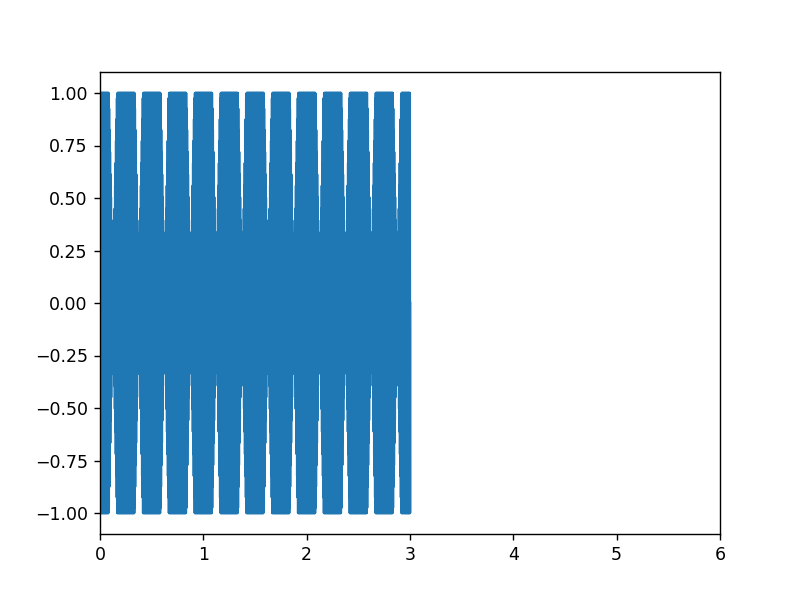

FloatSlider(value=3.0, description='Seconds', max=6.0, min=1.0)

FloatSlider(value=1.0, description='Amplitude', max=10.0)

IntSlider(value=220, description='Pitch', max=1000, step=5)

FloatSlider(value=1.0, description='Tone', max=5.0)

Output()

In [1]:
from typing import Any, Final

from ipywidgets import widgets
from IPython.display import Audio, display
from matplotlib import pyplot as plt
import numpy as np

%matplotlib notebook

framerate: Final[int] = 44_100  # 44,100 Hz (44.1 kHz).

def make_data(
    sec: int = 3,
    amp: float = 1.0,
    pitch: float = 220,
    tone: float = 1.0,
) -> tuple[np.ndarray, np.ndarray]:
    num = int(framerate*sec)
    x = np.linspace(start=0, stop=sec, num=num)
    y =  np.sin(2*np.pi * pitch * x)
    y += np.sin(2*np.pi * (pitch * tone + 4) * x)
    y *= amp
    y = np.clip(y, -1, 1)
    return x, y

def alarm(sec: int, amp: float, pitch: float, tone: float) -> Audio:
    """Sound an alarm for ``sec`` seconds."""
    x, y = make_data(sec=sec, amp=amp, pitch=pitch, tone=tone)
    return Audio(data=y, rate=framerate, autoplay=False, normalize=False)

def update_plot(sec: int, amp: float, pitch: float, tone: float) -> None:
    x, y = make_data(sec=sec, amp=amp, pitch=pitch, tone=tone)
    line.set_xdata(x)
    line.set_ydata(y)
    fig.canvas.draw_idle()

def update() -> None:
    sec_ = sec.value
    amp_ = amp.value
    pitch_ = pitch.value
    tone_ = tone.value
    args = [sec_, amp_, pitch_, tone_]
    update_plot(*args)
    with output:
        output.clear_output(wait=True)
        audio = alarm(*args)
        display(audio)

# Initialize figure and sine wave plot
fig, ax = plt.subplots()
ax.set_xlim(0, 6)
ax.set_ylim(-1.1, 1.1)
x, y = make_data()
line, = ax.plot(x, y)  # Initial sine wave

output = widgets.Output()
sec = widgets.FloatSlider(value=3.0, min=1.0, max=6.0, step=0.1, description="Seconds")
amp = widgets.FloatSlider(value=1.0, min=0.0, max=10.0, step=0.1, description="Amplitude")
pitch = widgets.IntSlider(value=220, min=0, max=1_000, step=5, description="Pitch")
tone = widgets.FloatSlider(value=1.0, min=0, max=5.0, step=0.1, description="Tone")
sliders = (sec, amp, pitch, tone)
for slider in sliders:
    slider.observe(lambda _: update(), names="value")

display(*sliders, output)
update()
update_plot(*(s.value for s in sliders))